# An Analysis of London Underground Exit Data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Below is the initial dataframe that we will work with. It displays the stations as rows with the number of exits within the hour as columns. I have added a column on the end which has summed all of the rows to provide a total per station within this specific day. 

In [31]:
exits = pd.read_csv('hourlyExits.csv')
exits = exits.set_index('Station')
exits['total'] = exits.sum(axis=1)
exits.head()

,H05,H06,H07,H08,H09,H10,H11,H12,H13,H14,...,H17,H18,H19,H20,H21,H22,H23,H00,H01,total
Station,,,,,,,,,,,,,,,,,,,,,
Acton Town,30,208,710,812,448,231,221,259,301,327,...,917,1077,793,505,424,424,366,210,54,9362
Aldgate,36,301,1319,3076,3013,1037,587,554,559,514,...,1116,1155,566,331,260,237,171,58,0,16136
Aldgate East,50,324,1192,3045,3381,1340,897,920,919,866,...,1263,1605,1127,708,560,532,457,239,26,21206
Alperton,16,101,230,372,254,149,137,152,176,205,...,679,724,424,222,161,143,146,72,6,5118
Amersham,3,18,82,246,96,56,48,62,75,94,...,409,692,540,287,182,154,175,99,6,3905


Below I have simplified and summed the AM hours of 'H07', 'H08' and 'H09' as well as the PM hours of 'H16', 'H17' and 'H18'. I have then calculated each stations relative proportions to their total number of exits in the day. For example, Aldgate's traffic within the AM hours account for 45.9% of it's daily traffic, with 18.5% of it's traffic occurring in the PM hours. Using proportions makes it very clear to see which stations have a higher amount of traffic in the morning compared to the evening and may help us identify which stations are primarily used for work and which are either residential or potentially tourist or other.

In [30]:
peak_counts = exits.copy()
peak_counts = peak_counts[['H07', 'H08', 'H09', 'H16', 'H17', 'H18']]
peak_counts['AM_peak'] = sum([peak_counts.H07,peak_counts.H08,peak_counts.H09])
peak_counts['PM_peak'] = sum([peak_counts.H16,peak_counts.H17,peak_counts.H18])
peak_counts = peak_counts.drop(columns=['H07', 'H08', 'H09', 'H16', 'H17', 'H18'])
peak_counts['total'] = exits.total
peak_counts['AM_prop'] = peak_counts.AM_peak/peak_counts.total
peak_counts['PM_prop'] = peak_counts.PM_peak/peak_counts.total
peak_counts = peak_counts[['AM_peak', 'PM_peak', 'AM_prop', 'PM_prop', 'total']]


peak_counts.head()

,AM_peak,PM_peak,AM_prop,PM_prop,total
Station,,,,,
Acton Town,1970,2628,0.210425,0.280709,9362
Aldgate,7408,2992,0.459098,0.185424,16136
Aldgate East,7618,3803,0.359238,0.179336,21206
Alperton,856,1847,0.167253,0.360883,5118
Amersham,424,1465,0.108579,0.375160,3905


Below I have a table describing all the summary statistics of the above data. Within the AM_prop column we can see that the mean is higher than the median by around 0.04, this could suggest that the AM is positively skewed, while the PM_prop mean and median are very near to one another, suggesting that the PM could be normally distributed. The standard deviations of both PM and AM proportions are different too, with the AM being higher so suggesting that the values are more spread out from the mean, while the PM standard deviation is lower implying that the values are clustered closer to the mean. \
The AM minimum value is 0.04 which is lower than the PM minimum value of 0.08. The AM maximum value of 0.63 is also quite a lot higher than both the PM maximum value of 0.49 as well as the AM's own 75th percentile value of 0.26. This could imply that the AM hours have a number of outliers in comparison to the PM hours where the data appears to be more stable as there is not such a large jump between the maximum value (0.49) and the 75th percentile (0.36). 

In [4]:
peak_counts.describe()

,AM_peak,PM_peak,AM_prop,PM_prop,total
count,268.000000,268.000000,268.000000,268.000000,268.000000
mean,4549.768657,4477.555970,0.207132,0.298750,17194.477612
std,8181.784059,6276.463316,0.122161,0.087724,23480.190142
min,27.000000,239.000000,0.045302,0.084630,596.000000
25%,677.500000,1471.750000,0.116120,0.240947,4889.500000
50%,1517.000000,2622.000000,0.169378,0.307397,9210.000000
75%,4315.250000,4707.750000,0.266443,0.361596,19999.500000
max,61116.000000,59486.000000,0.630427,0.496079,149258.000000


The boxplot below may be better at illustrating the differences between the AM proportion and the PM proportion. We can quite clearly see that the PM proportion has a far higher median than the AM with a smaller range of values. Again, showing that the values of PM are more clustered than that of AM. The AM boxplot also shows a number of outliers high up above 0.5. These stations could be the minority that are extremely work related such as Canary Wharf or Bank & Monument. In this case, it could actually be the outliers that are the most useful data to us as these are the most obvious choices to be designated as 'work' stations. We can also see that the 3rd quartile of AM and 1st quartile of PM slightly overlap, therefore 75% of the AM data falls into the same range as the first 25% of the PM data. This could again show that for the vast majority of stations, they have a higher PM proportion than AM proportion of exits.  

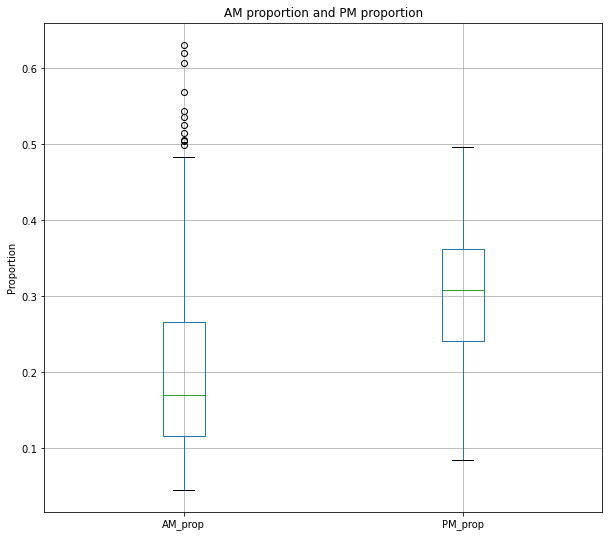

In [33]:
plt.figure(figsize=(10,9))
peak_counts.boxplot(column=['AM_prop','PM_prop'])
plt.title('AM proportion and PM proportion')
plt.ylabel('Proportion')
plt.show()

Below are 2 histograms comparing the distributions of the AM proportion and PM proportion. \
The AM histogram is very positively skewed with a larger number of values centered around 0.1. Tube stations that see heavy traffic in the morning are usually used for workers. This histogram could imply that the majority of London tube stations are not used for work and therefore many of them will have low numbers of people using them. You can see that as the proportion increases the frequency decreases which would suggest that there are a small number of stations that have heavier usage in the mornings which would correlate to there being less central tube stations. \
The PM histogram is closer to being normally distributed with the values centered around a proportion of 0.3. This shows that most stations have a higher proportion of exits in the PM peak and could imply that the majority of tube stations are not work related, they could be residential or somewhere in between which see more usage later in the evening for non-work related activities. You could expect both these histograms to be mirror images of one another, however if there are many more residential tube stations than work tube stations then the residential tube stations may outweigh the lower PM proportions of the work tube stations and bring the distribution closer to normal, rather than being negatively skewed as you may expect.

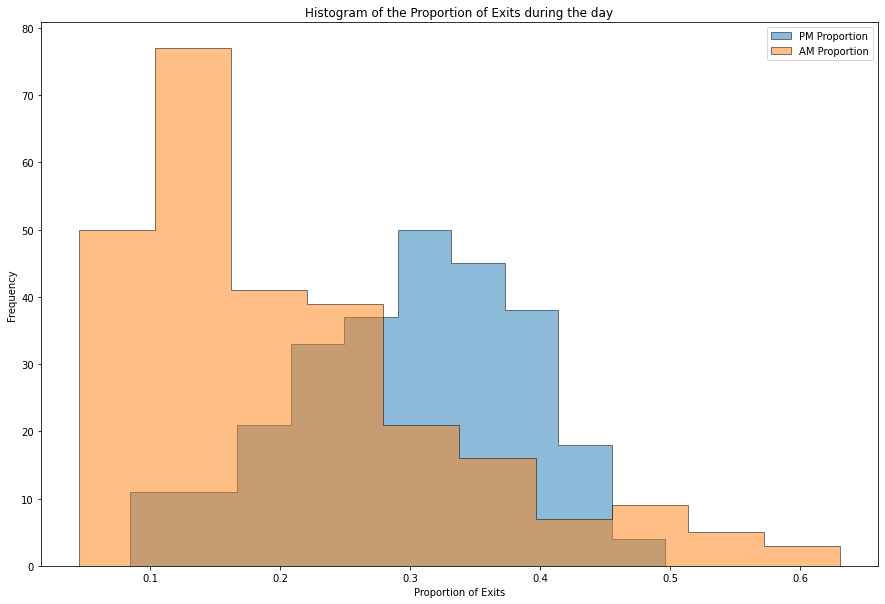

In [5]:
plt.figure(figsize=(15,10))
plt.hist(peak_counts.PM_prop, alpha=0.5, edgecolor='black', histtype='stepfilled')
plt.hist(peak_counts.AM_prop, alpha=0.5, edgecolor='black', histtype='stepfilled')
plt.legend(['PM Proportion', 'AM Proportion'])
plt.xlabel('Proportion of Exits')
plt.ylabel('Frequency')
plt.title('Histogram of the Proportion of Exits during the day')
plt.show()

Below, I have classified all the stations into a class of either 'work', 'residential' or 'other'. My method of differentiation was to calculate the difference between the AM and PM proportions. If the AM proportion was greater than the PM by 0.1 or more, the station is classified as 'work' and vice versa for 'residential'. The station is classified as 'other' if they are within a distance of 0.1 of each other. 'Other' stations usually correlate to tourist areas such as Leicester Square or Embankment which may see a similar amount of traffic both in the morning and evening. 
I chose a threshold of 0.1 as it was sensitive enough to distinguish between 'work' and 'residential' stations but also not too large (>0.15) as to improperly classify some stations as 'other'. Most station proportions also seem to be either quite close together (<0.1) and so are simple to designate as 'other', or they are quite far apart and thus easy to designate into either 'work' or 'residential'. 

In [32]:
peak_counts['class'] = peak_counts.apply(lambda row: 'work' if row['AM_prop'] - row['PM_prop'] > 0.10 else ('residential' if 
                                    row['PM_prop'] - row['AM_prop'] > 0.10 else 'other'), axis=1)
peak_counts.head()

,AM_peak,PM_peak,AM_prop,PM_prop,total,class
Station,,,,,,
Acton Town,1970,2628,0.210425,0.280709,9362,other
Aldgate,7408,2992,0.459098,0.185424,16136,work
Aldgate East,7618,3803,0.359238,0.179336,21206,work
Alperton,856,1847,0.167253,0.360883,5118,residential
Amersham,424,1465,0.108579,0.375160,3905,residential


Below I have grouped and counted the number of stations and their assigned class and created a pie chart of the percentage distribution. It agrees with my analysis higher up that there are more residential than work related tube stations, with other sitting somewhere in between. This may be why the PM histogram is more normally distributed, rather than being negatively skewed as we may have expected as the effect of 48 stations may not be an effective counterweight to the combined 220 residential and other stations.

In [7]:
peak_counts_grp = peak_counts.groupby('class')['total'].count().reset_index()
peak_counts_grp

,class,total
0,other,73
1,residential,147
2,work,48


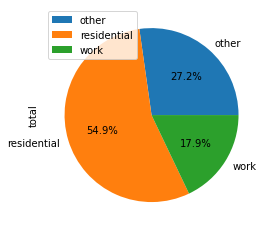

In [34]:
peak_counts_grp.plot.pie(y='total', autopct='%1.1f%%', labels=peak_counts_grp['class'])
plt.show()

Below, I have found a number of stations on the northern line that have differing classes. All the 'residential' stations exist within zones 3 and 4 (with High Barnet being in zone 5 at the very end of the line). All the 'work' stations are right next to one another within zone 1. Both of the 'other' stations are also within zone 1 but as mentioned previously they may be more popular among tourists than with workers so may see a similar amount of traffic throughout the entire day. In general, it can be inferred that 'residential' stations with a higher proportion of traffic in the PM are less likely to be based in zones 1 and 2 and vice versa with 'work' classed stations, that they are less likely to be based in zones 3 and higher.

In [9]:
northern_stations = ['Archway', 'Balham', 'Embankment', 'Goodge Street', 'Highgate'
                    , 'High Barnet', 'Leicester Square', 'Morden', 'South Wimbledon'
                    , 'Tottenham Court Road', 'Warren Street']
northern_line = peak_counts.loc[northern_stations]
northern_line

,AM_peak,PM_peak,AM_prop,PM_prop,total,class
Station,,,,,,
Archway,2190,4106,0.157158,0.294654,13935,residential
Balham,2637,7635,0.119170,0.345038,22128,residential
Embankment,10692,8829,0.316509,0.261360,33781,other
Goodge Street,5374,1949,0.419287,0.152064,12817,work
Highgate,893,3170,0.100101,0.355341,8921,residential
High Barnet,987,2362,0.144235,0.345170,6843,residential
Leicester Square,8952,12915,0.187390,0.270347,47772,other
Morden,1550,5955,0.098852,0.379783,15680,residential
South Wimbledon,1335,2198,0.185494,0.305405,7197,residential


In conclusion, we have found that on this particular day there were far more tube stations that were used more in the evening than in the morning. This could correlate to these stations being more 'residential' and therefore London containing more 'residential' tube stations than 'work' stations. We have also found that these AM stations have a number of outliers that are very high with some having more than half their daily traffic passing within these 3 hours. This could show that the morning rush of these stations is quite severe, with large numbers passing through them within a short period of time. On the other hand, the majority of PM values are more clustered together around lower proportions. This could show that whilst more stations have a greater traffic in the PM, the proportion of people overall per station is more consistent and less 'rush' based than the morning work stations. \
What may have helped is to have more days that we could look at. This sample is from a random day and may not accurately reflect the true state of the London tube stations. Having a larger time frame would allow us to be more accurate in our analysis as well as create further questions such as how does the traffic changes between weekdays and weekends? Or over holidays? Or how is working from home starting to affect how many people are coming into the office?

Thank you for reading! \
Elliot Linsey \
QMUL